# PCA Intro  <a class="tocSkip">
M Loecher

In [1]:
from IPython.display import HTML
import random
def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Toggle show/hide'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)

hide_toggle()
# _collapse = HTML('''<script>
# code_show=true; 
# function code_toggle() {
#  if (code_show){
#  $('div.input').hide();
#  } else {
#  $('div.input').show();
#  }
#  code_show = !code_show
# } 
# $( document ).ready(code_toggle);
# </script>
# <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dimensionality-Reduction" data-toc-modified-id="Dimensionality-Reduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Dimensionality Reduction</a></span></li><li><span><a href="#Review,-Terminology" data-toc-modified-id="Review,-Terminology-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Review, Terminology</a></span></li><li><span><a href="#Projections" data-toc-modified-id="Projections-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Projections</a></span><ul class="toc-item"><li><span><a href="#Reconstruction-of-original-data" data-toc-modified-id="Reconstruction-of-original-data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Reconstruction of original data</a></span></li><li><span><a href="#And-a-partial-reconstruction" data-toc-modified-id="And-a-partial-reconstruction-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>And a partial reconstruction</a></span></li></ul></li><li><span><a href="#Some-PCA-Math" data-toc-modified-id="Some-PCA-Math-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Some PCA Math</a></span></li><li><span><a href="#Digit-Recognition" data-toc-modified-id="Digit-Recognition-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Digit Recognition</a></span></li></ul></div>

__Principal components analysis__ (PCA) is one of a family of techniques for taking high-dimensional data, and using the dependencies between the variables to represent it in a more tractable, lower-dimensional form, without losing too much information. PCA is one of the simplest and most robust ways of doing such dimensionality reduction. It is also one of the oldest, and has been rediscovered many times in many fields, so it is also known as

- the Karhunen-Loève transformation,
- the Hotelling transformation,
- the method of empirical orthogonal functions, and
- singular value decomposition (SVD)

One view of it is the framework of __latent factors__.

Its main uses are in visualization, compression, regularization and understanding of data.

Let us review the seemingly “simple” notion of the __dimension of data__ which we usually set equal to p, the number of features/columns.

## Dimensionality Reduction
Case 1: baby measurements
<img src="img/babymeasurement.png" alt="Young parents are quite accustomed to reading growth charts such as this one
" title="Title text" />
Young parents are quite accustomed to reading growth charts such as this one

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn import preprocessing, decomposition, datasets
import pandas as pd
import seaborn as sns
from skimage import transform

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
pd.set_option('display.float_format', lambda x: '%.3f' % x)
hide_toggle()

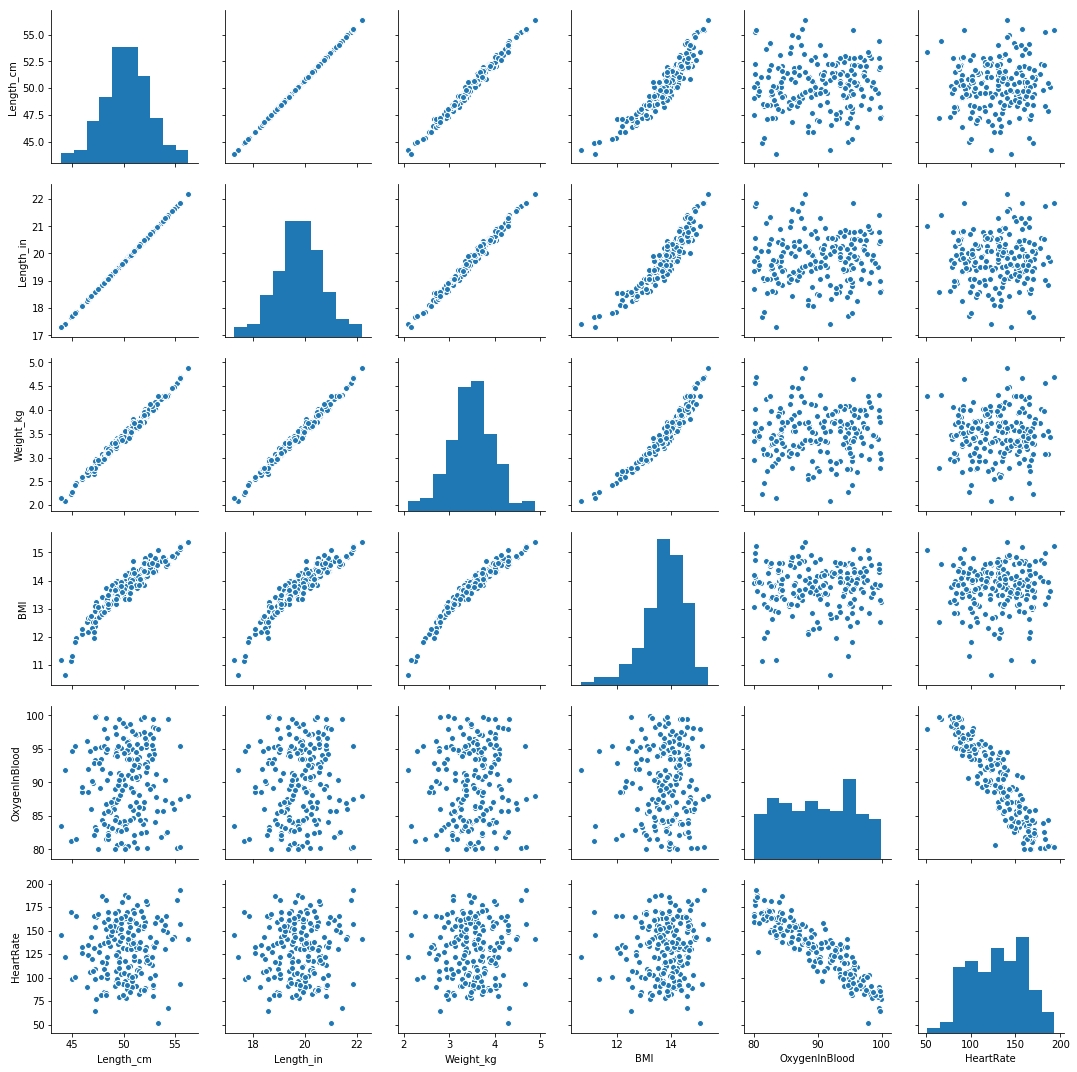

In [3]:
np.random.seed(1)
N=200

Length_cm = np.random.normal(50, scale=2.5, size=N)
Length_in = Length_cm/2.54
rho = 0.95

Weight_kg = 3.5 + 
0.5*preprocessing.scale(Length_cm + np.random.normal(0,0.25,N))

BMI = Weight_kg/(Length_cm/100)**2
OxygenInBlood = np.random.uniform(80,100, N)
HeartRate = 130 - 
30*preprocessing.scale(OxygenInBlood + np.random.normal(0,2.5,N))

babies = pd.DataFrame({'Length_cm':Length_cm,
                       'Length_in':Length_in,
                       'Weight_kg': Weight_kg,
                       'BMI':BMI,
                       'OxygenInBlood':OxygenInBlood, 
                       'HeartRate':HeartRate})

sns.pairplot(babies)

# Scale
X = preprocessing.scale(babies) # mean = 0, variance = 1, scale by column
babies_normalized = pd.DataFrame(X,columns=babies.columns)
hide_toggle()


## Review, Terminology
Dot (Inner) Product

In [3]:
a = np.array([0,1])
b = np.array([1,0])
inner1 = np.inner(a,b)
print(inner1)

0


In [4]:
a = np.array([1,1])
b = np.array([1,0])
inner1 = np.inner(a,b)
print(inner1)

1


## Projections

<img src="img/reviewProjectionsOntoUnitVectors.png"/>

<font size="5">Basis Vectors, Orthogonal, Orthonormal</font> <br>
Examples: Euclidean, Fourier

https://math.stackexchange.com/questions/1840236/how-does-the-orthogonality-of-sine-and-cosine-figure-in-the-fourier-series



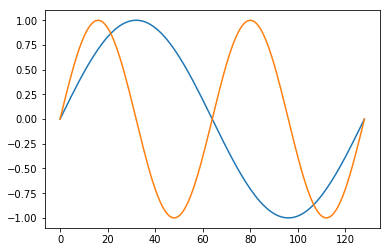

In [5]:
x = np.linspace(0, 1, num=129, endpoint=True)

b1 = np.sin(2*math.pi*x)
b2 = np.sin(4*math.pi*x)

plt.plot(b1)
plt.plot(b2)
plt.show()

<font size='5'> Variance Maximization</font>
<img src="img/varianceMaximization.png"/>
<font size='5'>loadings, Scores</font> <br>
We refer to the elements ϕ11,…,ϕp1 as the loadings of the first principal component; together, the loadings make up the principal component loading vector, <br>
<center>$phi_{1} = (\phi_{11} \phi_{21} \cdots \phi_{p1})^T$</center>

<font size ='5'> Embeddings </fonts>

In [5]:
pca1 = decomposition.PCA()
principalComponents1 = pca1.fit_transform(babies_normalized)
principalComponents1 = pd.DataFrame(principalComponents1)
principalComponents1.columns = ['PC'+str(i) for i in range(1,7)]
principalComponents1.describe()
hide_toggle()

Sum of explained Variance: 1.0


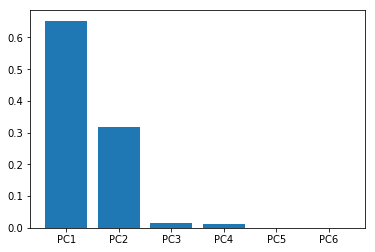

In [6]:
plt.bar(principalComponents1.columns,pca1.explained_variance_ratio_)
print('Sum of explained Variance:',sum(pca1.explained_variance_ratio_))
hide_toggle()

### Reconstruction of original data

In [26]:
#components_ : array, shape (n_components, n_features)
scores =pca1.transform(babies_normalized)
scores.shape

(200, 6)

In [27]:
pca1.components_.shape #these are the rotations 

(6, 6)

In [23]:
scores =pca1.transform(babies_normalized)
np.matmul(scores, pca1.components_)

array([[1.668, 1.668, 1.623, 1.253, 0.092, 0.015],
       [-0.789, -0.789, -0.698, -0.434, -1.130, 0.439],
       [-0.698, -0.698, -0.758, -0.739, 0.275, 0.109],
       ...,
       [0.345, 0.345, 0.446, 0.665, 0.475, -0.243],
       [0.774, 0.774, 0.770, 0.750, 1.364, -1.455],
       [1.030, 1.030, 1.262, 1.470, -0.161, 0.426]])

In [30]:
babies_normalized[0:10]

,Length_cm,Length_in,Weight_kg,BMI,OxygenInBlood,HeartRate
0,1.668,1.668,1.623,1.253,0.092,0.015
1,-0.789,-0.789,-0.698,-0.434,-1.130,0.439
2,-0.698,-0.698,-0.758,-0.739,0.275,0.109
3,-1.296,-1.296,-1.080,-0.675,1.787,-1.748
4,0.834,0.834,0.687,0.465,1.149,-1.367
5,-2.646,-2.646,-2.836,-3.934,0.359,-0.259
6,1.800,1.800,1.618,1.037,1.714,-2.088
7,-0.954,-0.954,-1.050,-1.129,1.450,-1.515
8,0.233,0.233,0.111,0.027,0.364,0.336
9,-0.391,-0.391,-0.176,0.301,-1.635,-0.100


### And a partial reconstruction

Keeping only the first 3 components

In [31]:
np.matmul(scores[:,0:2], pca1.components_[0:2,:])

array([[1.562, 1.562, 1.570, 1.524, 0.089, 0.010],
       [-0.691, -0.691, -0.688, -0.666, -0.808, 0.764],
       [-0.722, -0.722, -0.727, -0.706, 0.061, -0.107],
       ...,
       [0.454, 0.454, 0.454, 0.439, 0.372, -0.343],
       [0.776, 0.776, 0.768, 0.742, 1.434, -1.384],
       [1.202, 1.202, 1.211, 1.177, -0.257, 0.333]])

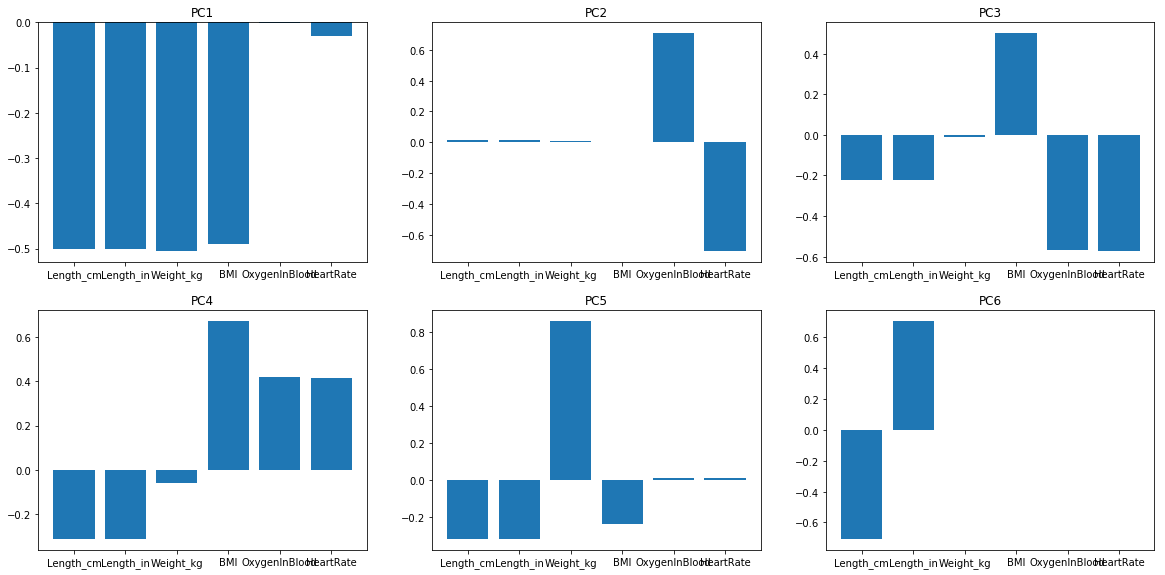

In [48]:
plt.figure(figsize=(20,15))
for i in range(6):
    plt.subplot(3, 3, i+1)
    plt.bar(babies.columns, pca1.components_[i])
#     plt.bar(babies.columns, np.absolute(pca1.components_[i]))
    plt.title('PC'+str(i+1))
hide_toggle()

<font size='5'> Visualize babies in 2D </font>

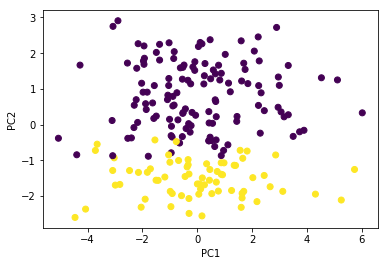

In [47]:
color = (babies['OxygenInBlood'] < 87) | (babies['HeartRate']>190)
plt.scatter(principalComponents1['PC1'], principalComponents1['PC2'], c=color)
plt.xlabel('PC1')
plt.ylabel('PC2')
hide_toggle()
# plt.show()

<font size='5'> iris data </font>

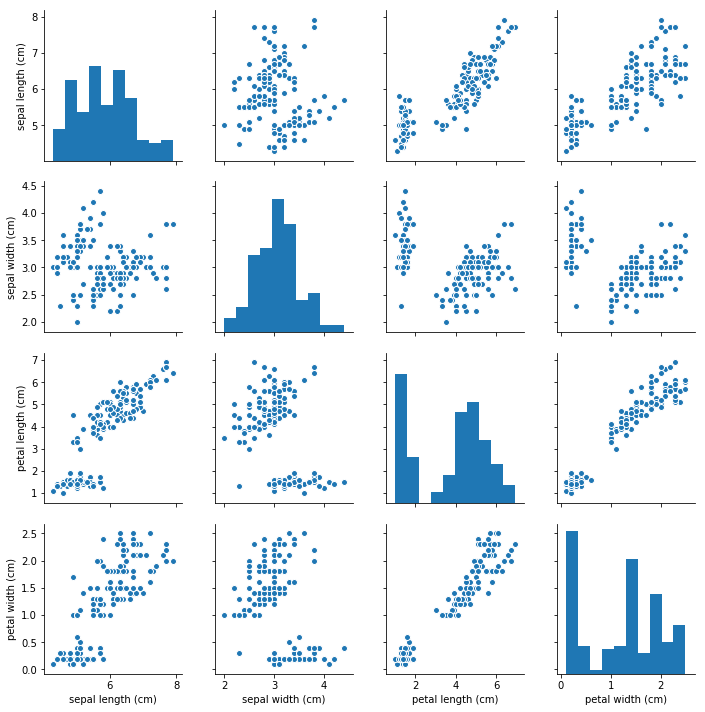

In [7]:
iris = datasets.load_iris()
iris_y = iris.target
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
sns.pairplot(iris)
hide_toggle()

<font size='3'> Analyzing the results </font><br>
The PCA function returns an object, which has some methods available. It contains the standard deviation of each of the four PCs, and their rotation (or loadings), which are the coefficients of the linear combinations of the continuous variables.

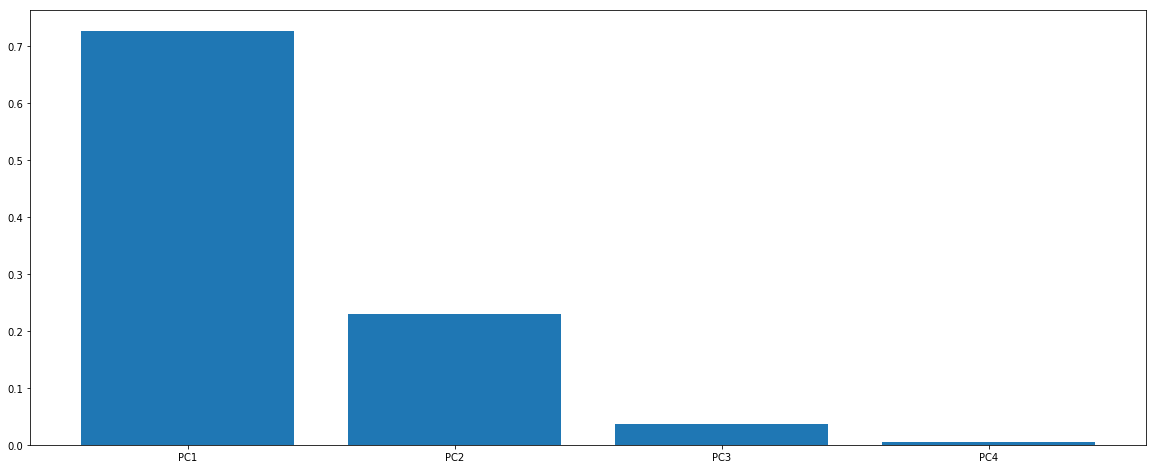

In [10]:
X = preprocessing.scale(iris) # mean = 0, variance = 1, scale by column
iris_normalized = pd.DataFrame(X,columns=iris.columns)

pca_iris = decomposition.PCA()
principalComponents_iris = pca_iris.fit_transform(iris_normalized)
principalComponents_iris = pd.DataFrame(principalComponents_iris,columns = ['PC'+str(i+1) for i in range(4)])


plt.figure(figsize=(20,8))
plt.bar(principalComponents_iris.columns,pca_iris.explained_variance_ratio_)
hide_toggle()


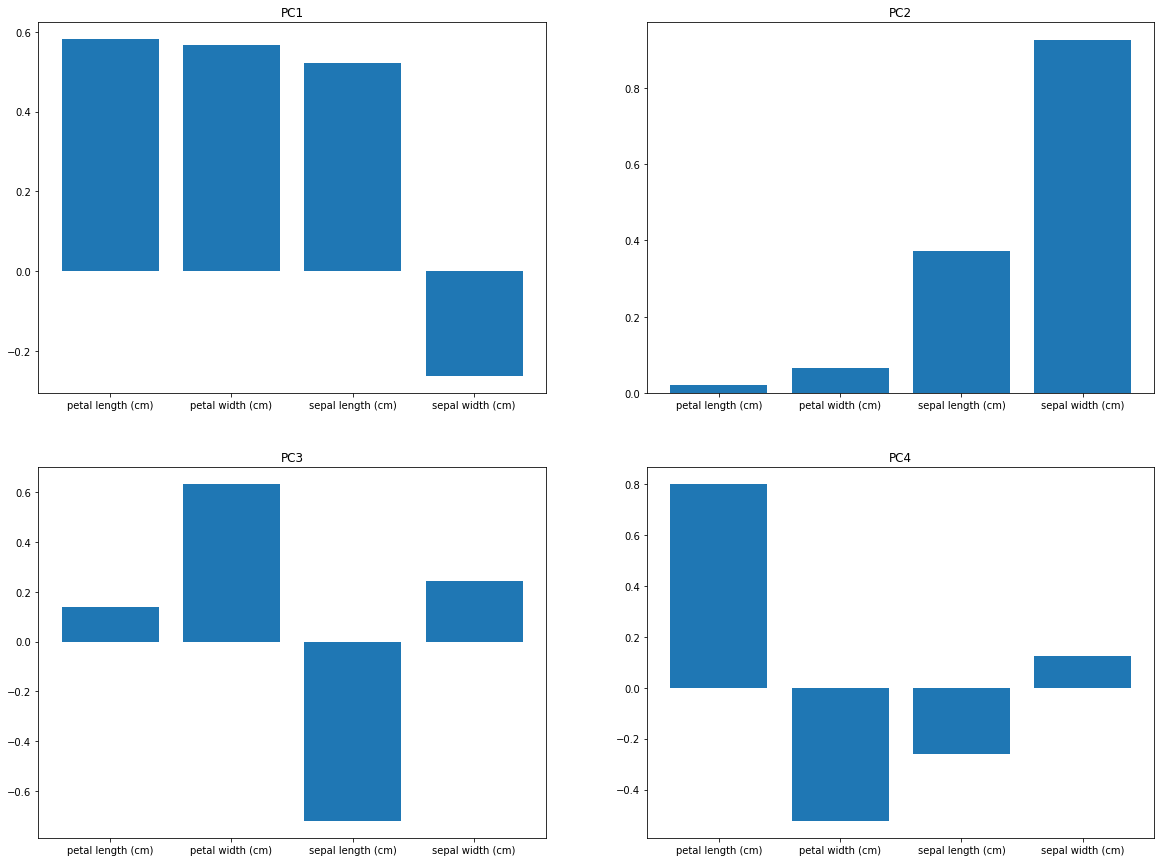

In [11]:
plt.figure(figsize=(20,15))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.bar(iris.columns, pca_iris.components_[i])
#     plt.bar(babies.columns, np.absolute(pca1.components_[i]))
    plt.title('PC'+str(i+1))

The following __biplot__ projects the data on the first two PCs. It colors each point according to the flowers’ species.

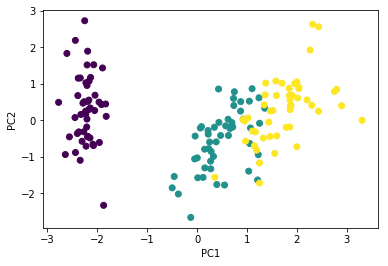

In [50]:
plt.scatter(x=principalComponents_iris['PC1'], y=principalComponents_iris['PC2'], c=iris_y)
plt.xlabel('PC1')
plt.ylabel('PC2')
# plt.show()
hide_toggle()

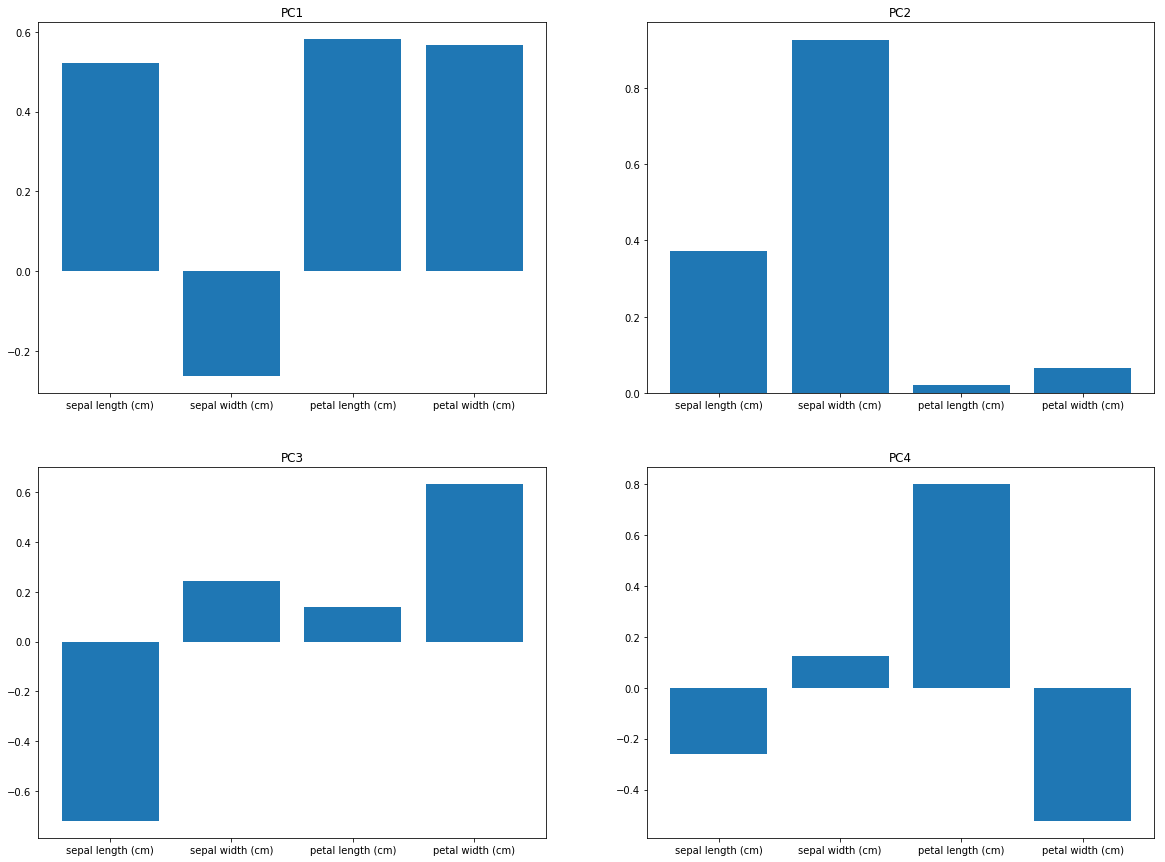

In [51]:
plt.figure(figsize=(20,15))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.bar(iris.columns, pca_iris.components_[i])
#     plt.bar(babies.columns, np.absolute(pca1.components_[i]))
    plt.title('PC'+str(i+1))
# plt.show()
hide_toggle()


<font size='5'> Biplots </font> <br>
[TReat: Hastie Tibshirani explain biplots](https://www.youtube.com/watch?v=dbuSGWCgdzw&feature=youtu.be&t=193)



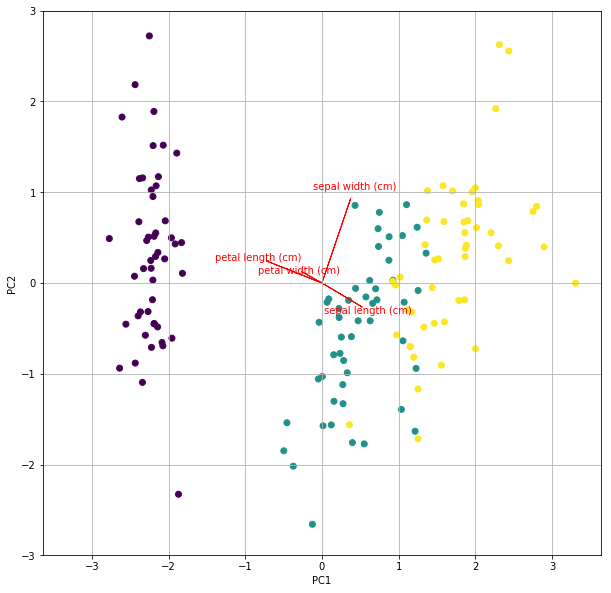

In [52]:
def biplot(PC1, PC2, target, components_, var_names, show=False):
    plt.figure(figsize=(10,10))
    plt.scatter(x=PC1, y=PC2, c=target) # Colored by target
    
    # Arrows for PCs
    for i in range(components_.shape[0]): # number of variables
        plt.arrow(0,0,components_[i,0], components_[i,1], color ='r')
        plt.text(components_[i,0]*1.15, components_[i,1]*1.15, color='r',s= var_names[i], ha='center', va = 'center')
        
    plt.xlim(-max(np.abs(PC1))*1.1,max(np.abs(PC1))*1.1)
    plt.ylim(-max(np.abs(PC2))*1.1,max(np.abs(PC2))*1.1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()
    if show:
        plt.show()
    
biplot(principalComponents_iris['PC1'],principalComponents_iris['PC2'],iris_y, pca_iris.components_, iris.columns)
hide_toggle()


#### Full Reconstruction

In [19]:
scores =pca_iris.transform(iris_normalized)
#What is the difference between transform fit_transform ?
Xreconstructed = np.matmul(scores, pca_iris.components_)
# is this phi or phi transpose ???
np.sum(np.abs(Xreconstructed-iris_normalized))

sepal length (cm)   0.000
sepal width (cm)    0.000
petal length (cm)   0.000
petal width (cm)    0.000
dtype: float64

#### Partial Reconstruction

In [26]:
#scores =pca_iris.transform(iris_normalized)
#What is the difference between transform fit_transform ?
Xreconstructed = np.matmul(scores[:,0:2], pca_iris.components_[0:2,:])
# is this phi or phi transpose ???
np.mean(np.abs(Xreconstructed-iris_normalized))

sepal length (cm)   0.221
sepal width (cm)    0.075
petal length (cm)   0.101
petal width (cm)    0.199
dtype: float64

In [14]:
scores2 =pca_iris.fit_transform(iris_normalized)
scores2

array([[-2.265, 0.506, -0.122, -0.023],
       [-2.086, -0.655, -0.227, -0.103],
       [-2.368, -0.318, 0.051, -0.028],
       [-2.304, -0.575, 0.099, 0.066],
       [-2.389, 0.675, 0.021, 0.037],
       [-2.071, 1.519, 0.031, -0.004],
       [-2.446, 0.075, 0.342, 0.038],
       [-2.234, 0.248, -0.083, 0.026],
       [-2.342, -1.095, 0.154, 0.027],
       [-2.189, -0.449, -0.247, 0.040],
       [-2.163, 1.071, -0.264, -0.015],
       [-2.327, 0.159, 0.100, 0.135],
       [-2.224, -0.709, -0.223, -0.003],
       [-2.640, -0.938, 0.190, 0.019],
       [-2.192, 1.890, -0.469, -0.193],
       [-2.251, 2.722, 0.033, -0.047],
       [-2.203, 1.514, -0.001, -0.187],
       [-2.190, 0.514, -0.039, -0.092],
       [-1.894, 1.431, -0.371, -0.060],
       [-2.340, 1.158, 0.137, 0.040],
       [-1.915, 0.430, -0.416, -0.010],
       [-2.205, 0.952, 0.165, -0.058],
       [-2.774, 0.490, 0.339, -0.018],
       [-1.820, 0.107, 0.040, -0.150],
       [-2.228, 0.162, 0.124, 0.271],
       [-1.957, -

<font size='5'> housing data </font>

In [56]:
housing = datasets.fetch_california_housing()
housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.325,41.000,6.984,1.024,322.000,2.556,37.880,-122.230
1,8.301,21.000,6.238,0.972,2401.000,2.110,37.860,-122.220
2,7.257,52.000,8.288,1.073,496.000,2.802,37.850,-122.240
3,5.643,52.000,5.817,1.073,558.000,2.548,37.850,-122.250
4,3.846,52.000,6.282,1.081,565.000,2.181,37.850,-122.250


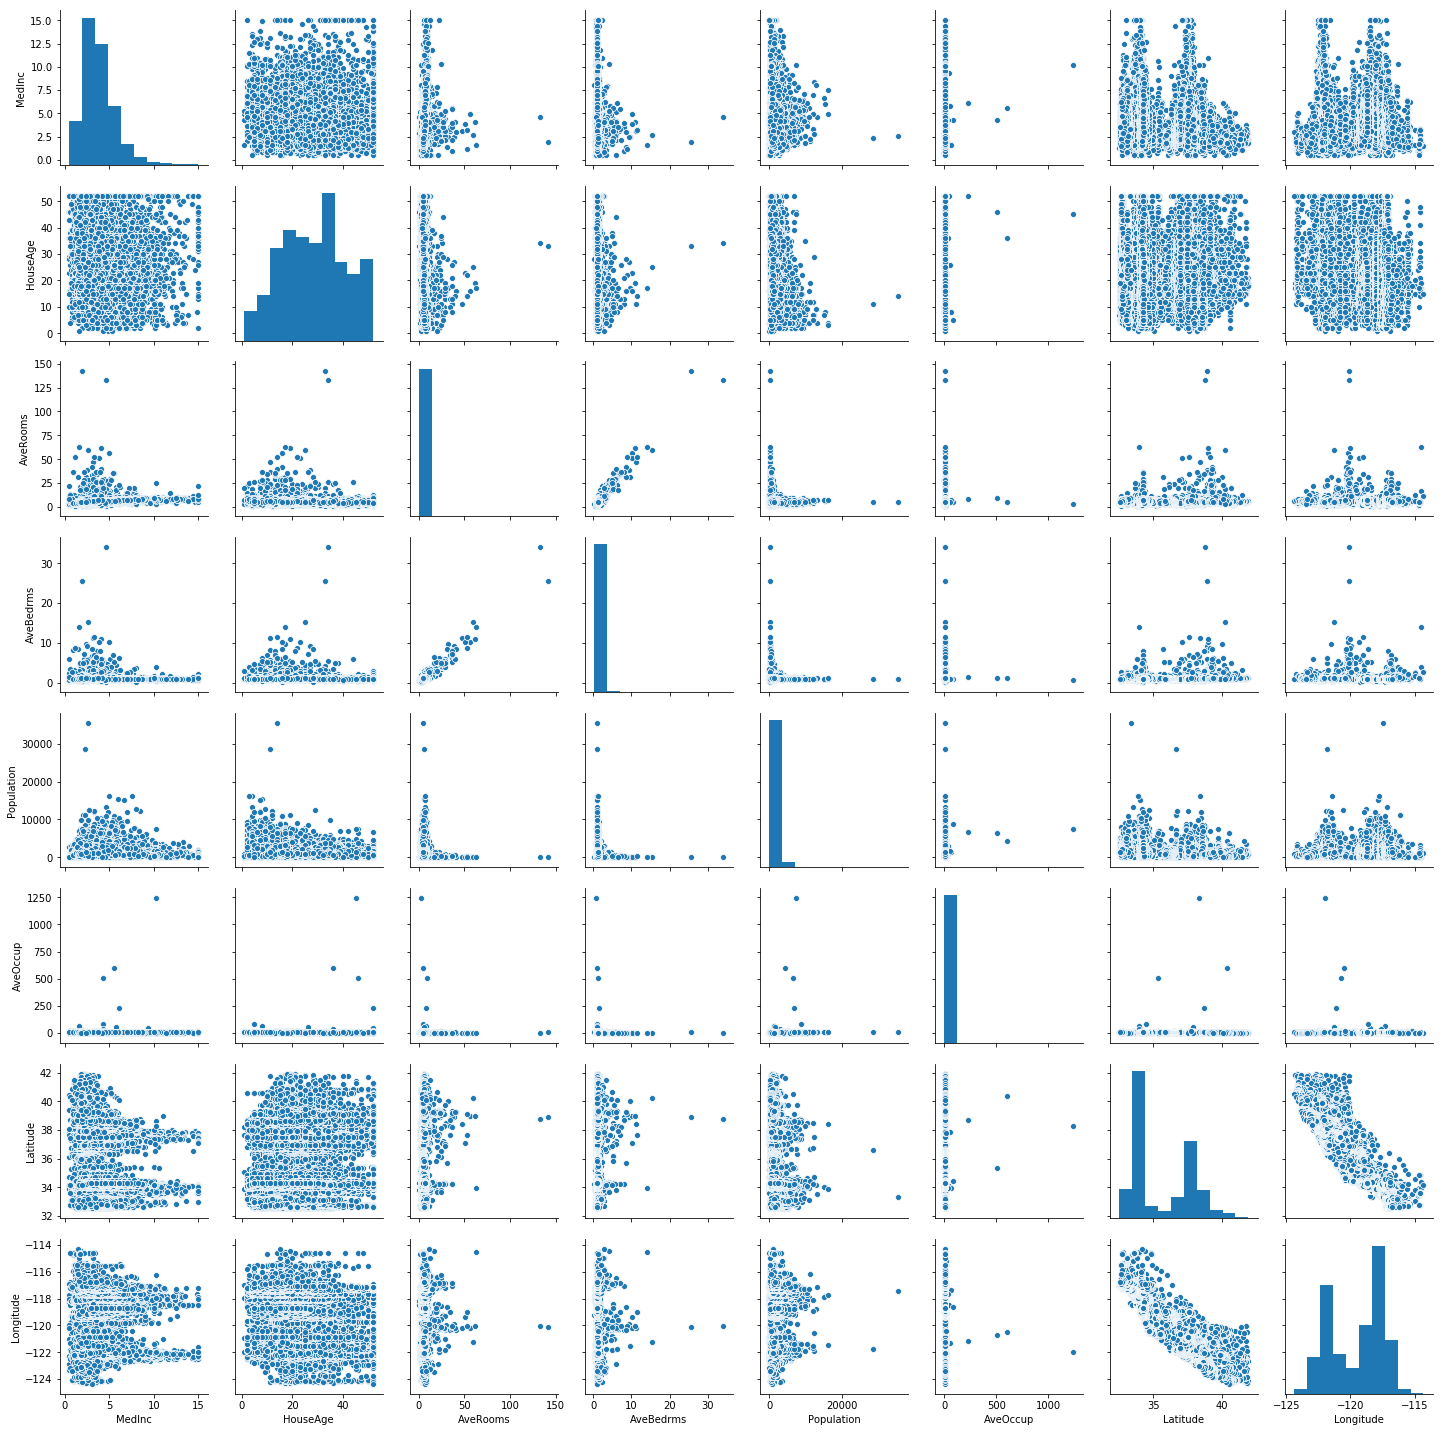

In [57]:
sns.pairplot(housing_df)
hide_toggle()

<font size='3'> housing, PCA </font>

In [43]:
housing_df_normalized = preprocessing.scale(housing_df)
pca_housing = decomposition.PCA()
scores_housing = pca_housing.fit_transform(housing_df_normalized)
hide_toggle()

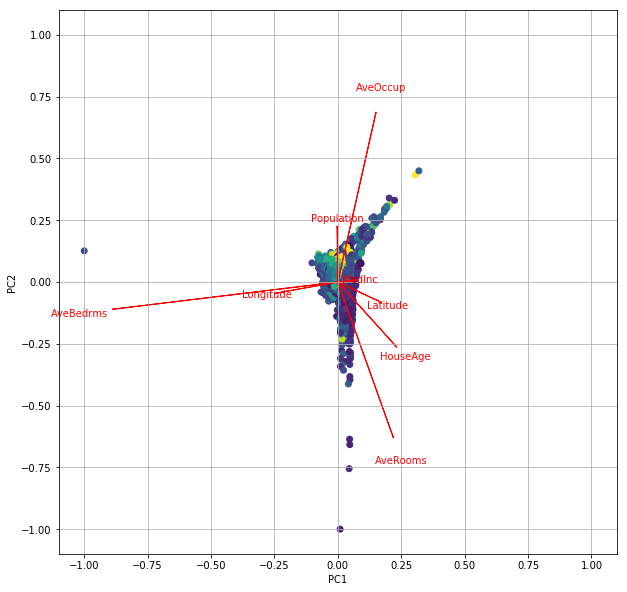

In [59]:
PC1_housing = np.log(scores_housing[:,0] - min(scores_housing[:,0]*1.001)) # postive --> log
PC2_housing = np.log(scores_housing[:,1] - min(scores_housing[:,1]*1.001))

PC1_housing -= np.mean(PC1_housing) # scale
PC2_housing -= np.mean(PC2_housing)

PC1_housing /= np.max(np.abs(PC1_housing))
PC2_housing /= np.max(np.abs(PC2_housing))

biplot(PC1=PC1_housing,
       PC2=PC2_housing,
       components_=pca_housing.components_,
       target=housing.target, 
       var_names=housing.feature_names)
hide_toggle()

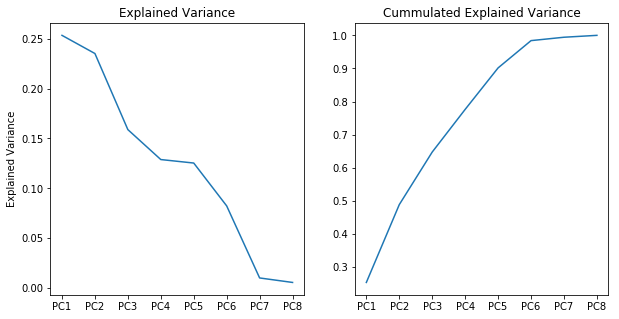

In [24]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1) # subplot(nrows, ncols, index, **kwargs)
plt.title('Explained Variance')
plt.plot(['PC'+str(i+1) for i in range(8)],pca_housing.explained_variance_ratio_)
plt.ylabel('Explained Variance')

plt.subplot(1,2,2)
plt.title('Cummulated Explained Variance')
plt.plot(['PC'+str(i+1) for i in range(8)],np.cumsum(pca_housing.explained_variance_ratio_))
hide_toggle()


<font size='3'> Housing, regression </font>
1. Fit a linear model using all variables (y = price)
2. Fit a linear model using just the first k PCs that “explain” >95% of the variance
3. Compare test error of the models

## Some PCA Math
Amazingly, PCA s based on __minimizing squared resiudals__. i.e. can be viewed as another LS (least squares) technique

One explanation of PCA is that it finds the projections which _maximize the variance_. The first principal component is the direction in space along which projections have the largest variance. The second principal component is the direction which maximizes variance among all directions orthogonal to the first. The kth component is the variance-maximizing direction orthogonal to the previous $k−1$ components. There are $p$ principal components in all.

Another view -which turns out to be equivalent to maximizing the variance:

Find those projections with the smallest average (mean-squared) distance (=residual!) between the original vectors and their projections on to the principal components.

<font size='3'> Minimizing Projection Residuals </font>
<center>$
MSE(\vec{\omega}) = \frac{1}{n} \sum_{i=1}^{n} {||\vec{x}_i - (\vec{\omega} \cdot \vec{x}_i ) \vec{\omega} ||^2} = \frac{1}{n} \left( \sum_{i=1}^{n} {||\vec{x}_i ||^2} - \sum_{i=1}^{n} {(\vec{\omega} \cdot \vec{x}_i ) ^2} \right)
$</center>

And since $\overline{\omega \cdot \vec{x}} = 0$ we find that minimizing projection residuals is the same as maximizing the projection variance!

## Digit Recognition 
<img src='img/digitRecongtion.png'> 
base R plot of a single digit:



In [4]:
# define some utility function for the rest of the notebook
def plot_d(digit, label):
    plt.axis('off')
    plt.imshow(digit.reshape((28,28)), cmap=plt.cm.gray)
    plt.title(label)

def plot_ds(digits, title, labels):
    n=digits.shape[0]
    n_rows=n/25+1
    n_cols=25
    plt.figure(figsize=(n_cols * 0.9, n_rows * 1.3))
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle(title)
    for i in range(n):
        plt.subplot(n_rows, n_cols, i + 1)
        plot_d(digits[i,:], "%d" % labels[i])
        
def plot_clusters(predict, y, stats):
    for i in range(10):
        indices = np.where(predict == i)
        title = "Most freq item %d, cluster size %d, majority %d " % (stats[i,2], stats[i,1], stats[i,0])
        plot_ds(X_train[indices][:25], title, y[indices])
        
def clusters_stats(predict, y):
    stats = np.zeros((10,3))
    for i in range(10):
        indices = np.where(predict == i)
        cluster = y[indices]
        stats[i,:] = clust_stats(cluster)
    return stats
        
def clust_stats(cluster):
    class_freq = np.zeros(10)
    for i in range(10):
        class_freq[i] = np.count_nonzero(cluster == i)
    most_freq = np.argmax(class_freq)
    n_majority = np.max(class_freq)
    n_all = np.sum(class_freq)
    return (n_majority, n_all, most_freq)
    
def clusters_purity(clusters_stats):
    majority_sum  = clusters_stats[:,0].sum()
    n = clusters_stats[:,1].sum()
    return majority_sum / n

def plot_pca_3d(points, out):
    scatter = {
        'mode':"markers",
        'name': "y",
        'type': "scatter3d",    
        'x': points[:,0], 
        'y': points[:,1], 
        'z': points[:,2],
        'marker': {'size':2, 'color':out, 'colorscale':'Rainbow'}
    }
    fig = {'data':[scatter], 'layout': {'title':"Digits 3 principal components"}}
    py.iplot(fig)

In [5]:
digits = pd.read_csv("data/trainDigits.csv.gz")

In [6]:
X_train = digits.iloc[:,1:].values
Y_train = digits.iloc[:,0].values

(42000, 784)


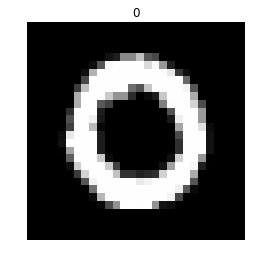

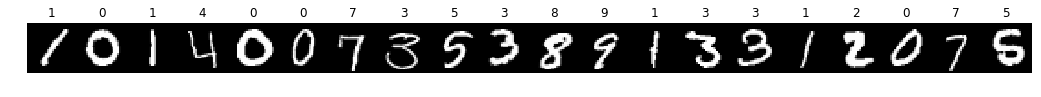

In [17]:
print(X_train.shape)
plot_d(X_train[1], Y_train[1])
n=20
plot_ds(X_train[0:n], "",Y_train[0:n])

<font size='3'>Tasks</font>
1. Compute PCA on handwritten digits drawn from the training set
2. How many components do you need to explain 70% of the variance ?
3. Repeat the above 2 steps for just the digit 3
4. Plot images of the first 8 PCs for digit 3
5. Train a classification model of your choice to predict the binary problem “digit 3 yes/no”"
 - Using all features 
 - just the first 50 PCs
6. Predict on test data and estimate your prediction accuracy


These components for digits are also called <br>
Eigendigits Eigenfaces<br>
Eigenvector Eigenvalue<br>
Nicely illustrated in the ESL book (Eq 14.55)<br>
<img src='img/ESLBook_Eq14_55.png'>

We see that the v1 (horizontal movement) mainly accounts for the lengthening of the lower tail of the three,while v2 (vertical movement) accounts for character thickness.



